In [66]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
df = pd.read_csv('./gridsearch/gridsearch.csv')

In [68]:
df['dataset'].describe()

count     177
unique      2
top       orl
freq      126
Name: dataset, dtype: object

In [3]:
def get_residue_loss(n):
    ''' gets loss, residue values'''
    res = []
    for f in f'losses/loss{n}.csv', f'losses/residue{n}.csv':
        with open(f, 'r') as file:
            res.append(list(map(float, file.read().split(',\n')[1:])))
    return res

In [4]:
df['loss'] = list(map(lambda x: min(get_residue_loss(x)[0]), df['result_filenumber']))
df['residue'] = list(map(lambda x: min(get_residue_loss(x)[1]), df['result_filenumber']))
df['iterations'] = list(map(lambda x: len(get_residue_loss(x)[0]), df['result_filenumber']))

In [49]:
df.loc[df['model_type'] == 'l21', 'residue'] /= 100
x = df[
    (df['ratio_white'] == 0.8) &
    (df['proportion_noise'] == 0.4) &
    (df['dataset'] == 'orl') &
    True
]

,components,proportion_noise,ratio_white,dataset,model_type,result_filenumber,reconstruction_error,train_time
55,20,0.1,0.5,orl,l2,109,0.198398,8.070602


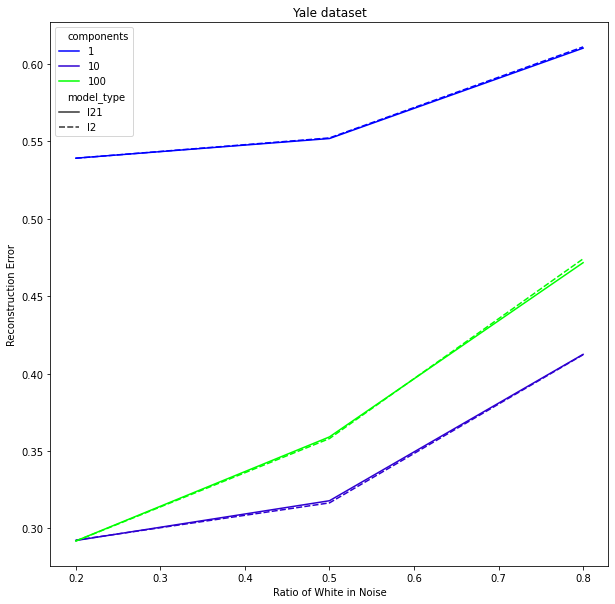

In [75]:
plt.figure(figsize=(10,10))
g = sns.lineplot(
    data=df[
        #(df['ratio_white'] == 0.2) &
        (df['proportion_noise'] == 0.2) &
        (df['dataset'] == 'yale') &
        #(df['model_type'] == 'l2') &
        #((df['components'] == 20) | (df['components'] == 1000) | (df['components']  == 100) | (df['components'] == 500)) &
        True
    ],
    x='ratio_white',
    y='reconstruction_error',
    hue='components',
    style='model_type',
    palette='brg')
#g.set_yscale('log')
#g.set_xscale('log')
#print(df[df['residue'] == min(df['residue'])])
plt.title('Yale dataset')
plt.xlabel('Ratio of White in Noise')
plt.ylabel('Reconstruction Error')
plt.savefig('./figures/Noisep_vs_RWN_YALE.png')
#plt.show()
dataset_section = df
dataset_section[dataset_section['reconstruction_error'] == min(dataset_section['reconstruction_error'])]

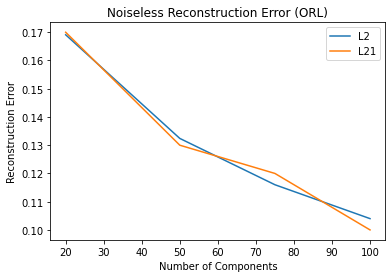

In [58]:
plt.plot([20, 50, 75, 100], [0.1691, 0.1324, 0.1160, 0.1040])
plt.plot([20, 50, 75, 100], [0.17, 0.13, 0.12, 0.10])
plt.legend(['L2', 'L21'])
plt.title('Noiseless Reconstruction Error (ORL)')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.savefig('figures/Noiseless_Reconstruction_Error_ORL.png')

In [78]:
df = pd.read_csv('components_vs_reconstruction_error_n5.csv')
df.columns

Index(['Unnamed: 0', 'reconstruction_error', 'run', 'iterations', 'components',
       'model'],
      dtype='object')

model: L2 components: 1 Mean: 0.2923559048218643 Standard Deviation: 0.0004388392100424442
model: L2 components: 10 Mean: 0.1953808624402484 Standard Deviation: 0.0005490355816315426
model: L2 components: 20 Mean: 0.16789983062711955 Standard Deviation: 0.0005388672173427658
model: L2 components: 50 Mean: 0.1308886739603606 Standard Deviation: 0.0004132185655958756
model: L2 components: 75 Mean: 0.11429681481676053 Standard Deviation: 0.0003425363788050476
model: L2 components: 100 Mean: 0.10205483757543617 Standard Deviation: 0.0004909644538046178
model: L21 components: 1 Mean: 0.2931506348334838 Standard Deviation: 0.000771942481517541
model: L21 components: 10 Mean: 0.19523374539001837 Standard Deviation: 0.0003442563138493482
model: L21 components: 20 Mean: 0.16842938302915025 Standard Deviation: 0.00034023701578300507
model: L21 components: 50 Mean: 0.13170205029552268 Standard Deviation: 0.00042182623978184665
model: L21 components: 75 Mean: 0.11504136758850765 Standard Deviation

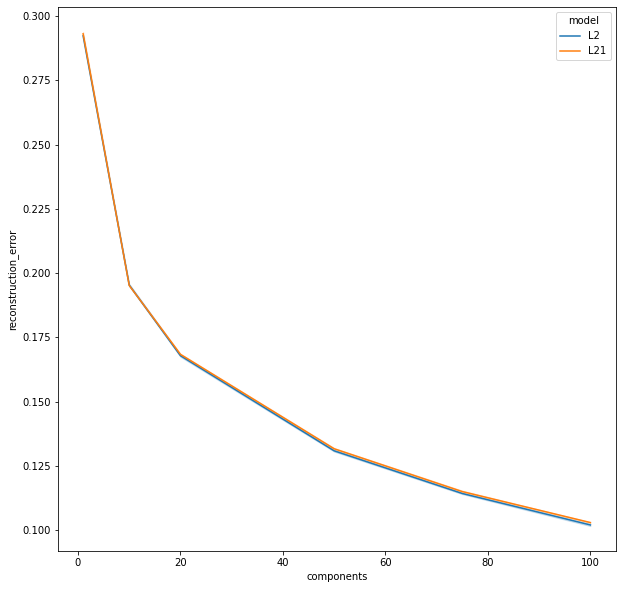

In [94]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df,
            y='reconstruction_error', x='components', hue='model')

for model in 'L2', 'L21':
    for components in 1, 10, 20, 50, 75, 100:
        rs = (df[(df['model'] == model) & (df['components'] == components)])['reconstruction_error']
        print('model:', model, 'components:', components, 'Mean:', rs.mean(), 'Standard Deviation:', np.std(rs))